In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tarfile
import math

from tensorflow import keras
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [30]:
from keras.callbacks import ReduceLROnPlateau

In [2]:
from keras.layers import AlphaDropout

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
from numpy.random import seed
seed(15)

from tensorflow.random import set_seed
set_seed(15)

In [5]:
manhattan_csv = '/content/drive/MyDrive/Boro_DFs/manhatt_df.csv'

In [6]:
manhattan_df = pd.DataFrame(pd.read_csv(manhattan_csv))

In [7]:
manhattan_df.head()

,Borough,Area,Address,Num_Beds,Num_Baths,Sq-Ft,Rent,Long,Lat,ZipCode,Precinct,CrimeTotalPastYear,Train_Line,Dist_To_Line,Dist_To_Station,Dist_To_Entrance
0,manhattan,Chelsea,130 W 15th Street,2.0,2.0,1377.37,9150.0,-73.997478,40.738415,10011,13.0,1549.0,L,0.001283,0.000726,0.000919
1,manhattan,Murray Hill,401 East 34th Street,2.0,2.0,1085.00,6276.0,-73.972708,40.743649,10016,13.0,1549.0,7,0.008466,0.008466,0.007582
2,manhattan,Washington Heights,432 West 163rd Street,2.0,1.0,855.99,2646.0,-73.938373,40.836002,10032,33.0,1126.0,A-C,0.001519,0.001519,0.001446
3,manhattan,South Harlem,207 West 121st Street,0.5,1.0,537.89,1950.0,-73.950435,40.806607,10027,28.0,1017.0,B-D,0.002599,0.004581,0.004434
4,manhattan,upper east side-carnegie hill,420 E 54th Street,1.0,2.0,851.00,5869.0,-73.963335,40.755807,10022,18.0,1926.0,E,0.001128,0.005973,0.006087


In [8]:
y = manhattan_df[['Rent']]

In [9]:
X = manhattan_df.drop(['Borough', 'Rent'], axis=1)
X.head()

,Area,Address,Num_Beds,Num_Baths,Sq-Ft,Long,Lat,ZipCode,Precinct,CrimeTotalPastYear,Train_Line,Dist_To_Line,Dist_To_Station,Dist_To_Entrance
0,Chelsea,130 W 15th Street,2.0,2.0,1377.37,-73.997478,40.738415,10011,13.0,1549.0,L,0.001283,0.000726,0.000919
1,Murray Hill,401 East 34th Street,2.0,2.0,1085.00,-73.972708,40.743649,10016,13.0,1549.0,7,0.008466,0.008466,0.007582
2,Washington Heights,432 West 163rd Street,2.0,1.0,855.99,-73.938373,40.836002,10032,33.0,1126.0,A-C,0.001519,0.001519,0.001446
3,South Harlem,207 West 121st Street,0.5,1.0,537.89,-73.950435,40.806607,10027,28.0,1017.0,B-D,0.002599,0.004581,0.004434
4,upper east side-carnegie hill,420 E 54th Street,1.0,2.0,851.00,-73.963335,40.755807,10022,18.0,1926.0,E,0.001128,0.005973,0.006087


In [10]:
X = pd.get_dummies(X, columns=['Area', 'Address', 'ZipCode', 'Precinct', 'Train_Line'])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [12]:
numeric_cols = ['Num_Beds', 'Num_Baths', 'Sq-Ft', 'Long', 'Lat', 'CrimeTotalPastYear', 'Dist_To_Line', 'Dist_To_Station', 'Dist_To_Entrance']

In [13]:
X_train_num = X_train[numeric_cols]

In [14]:
X_test_num = X_test[numeric_cols]

In [15]:
print(X_train_num.shape)
print(X_test_num.shape)

(6914, 9)
(1729, 9)


In [16]:
scaler = MinMaxScaler()

In [17]:
X_train_num = scaler.fit_transform(X_train_num)

In [18]:
X_train_num.shape

(6914, 9)

In [19]:
X_test_num = scaler.transform(X_test_num)

In [20]:
X_test_num.shape

(1729, 9)

In [21]:
X_train_onehots = X_train.drop(numeric_cols, axis=1)
X_test_onehots = X_test.drop(numeric_cols, axis=1)

In [22]:
X_train_onehots.shape

(6914, 4011)

In [23]:
X_test_onehots.shape

(1729, 4011)

In [24]:
X_train = np.concatenate((X_train_num, X_train_onehots), axis=1)

In [25]:
X_test = np.concatenate((X_test_num, X_test_onehots), axis=1)

In [26]:
# create validation set
num_val_insts = math.floor(X_train.shape[0]*(.10))

X_val = X_train[:num_val_insts]
y_val = y_train[:num_val_insts]

X_train = X_train[num_val_insts:]
y_train = y_train[num_val_insts:]

In [27]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (6223, 4020), y_train shape: (6223, 1)
X_val shape: (691, 4020), y_val shape: (691, 1)
X_test shape: (1729, 4020), y_test shape: (1729, 1)


In [28]:
from keras.initializers import lecun_normal

In [29]:
initialiser = lecun_normal(seed=31)

In [46]:
# model

model = models.Sequential()
model.add(layers.Dense(512, activation='selu', input_shape=(X_train.shape[1],), kernel_initializer=initialiser))
model.add(layers.Dense(512, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(512, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(512, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(512, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(512, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(512, activation='selu', kernel_initializer=initialiser))

model.add(layers.Dense(256, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(256, activation='selu', kernel_initializer=initialiser))

model.add(layers.Dense(128, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(128, activation='selu', kernel_initializer=initialiser))

model.add(layers.Dense(64, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(64, activation='selu', kernel_initializer=initialiser))


model.add(layers.Dense(1))

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               2058752   
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 dense_18 (Dense)            (None, 512)               262656    
                                                                 
 dense_19 (Dense)            (None, 512)               262656    
                                                                 
 dense_20 (Dense)            (None, 512)               262656    
                                                                 
 dense_21 (Dense)            (None, 512)              

In [48]:
model.compile(loss="huber_loss", optimizer=keras.optimizers.Adam(learning_rate=.001), metrics=["mae"])

In [49]:
early_stop = EarlyStopping(monitor='val_mae', mode='min', 
                           verbose=1, patience=30, min_delta=.5, 
                           restore_best_weights=True)

In [50]:
#reduce on plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_mae',
    patience=15,
    factor=.1,
    mode='min',
    min_delta=.5,
    verbose=1,
    min_lr=.0001
)

In [51]:
history = model.fit(X_train, y_train, epochs=300,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop, reduce_lr])

Epoch 1/300
195/195 [==============================] - 2s 6ms/step - loss: 2035.7292 - mae: 2036.2289 - val_loss: 1316.0753 - val_mae: 1316.5752 - lr: 0.0010
Epoch 2/300
195/195 [==============================] - 1s 5ms/step - loss: 1214.6517 - mae: 1215.1515 - val_loss: 1060.1322 - val_mae: 1060.6322 - lr: 0.0010
Epoch 3/300
195/195 [==============================] - 1s 5ms/step - loss: 949.2512 - mae: 949.7510 - val_loss: 946.9675 - val_mae: 947.4675 - lr: 0.0010
Epoch 4/300
195/195 [==============================] - 1s 4ms/step - loss: 845.0170 - mae: 845.5170 - val_loss: 1211.2728 - val_mae: 1211.7728 - lr: 0.0010
Epoch 5/300
195/195 [==============================] - 1s 4ms/step - loss: 817.8628 - mae: 818.3625 - val_loss: 1084.5857 - val_mae: 1085.0837 - lr: 0.0010
Epoch 6/300
195/195 [==============================] - 1s 4ms/step - loss: 775.4835 - mae: 775.9834 - val_loss: 923.9884 - val_mae: 924.4878 - lr: 0.0010
Epoch 7/300
195/195 [==============================] - 1s 4ms/st

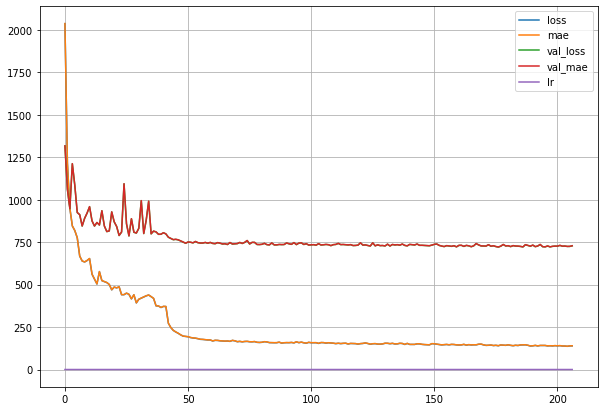

In [52]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.show()

In [53]:
scores = model.evaluate(X_test, y_test)

55/55 [==============================] - 0s 2ms/step - loss: 833.6248 - mae: 834.1235


In [54]:
preds = model.predict(X_test, verbose=1)

55/55 [==============================] - 0s 2ms/step


In [55]:
from scipy import stats

In [56]:
confidence = 0.95

abs_errors = abs(preds.flatten() - y_test.to_numpy().flatten())
stats.t.interval(confidence, len(abs_errors)-1, 
                         loc=abs_errors.mean(), 
                         scale=stats.sem(abs_errors))

(721.7911626262352, 946.455683878925)

In [57]:
# (760.9934827739783, 985.9652368447048)

In [58]:
model.save("manhattan_model.h5")

In [60]:
# /content/drive/MyDrive/Boro_DFs/
model.save("/content/drive/MyDrive/Boro_DFs/manhattan_model.h5")